How are in-demand skills trending for data analysts ?

In [40]:
#importing libraries
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast

# loding data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [41]:
df_DA_SA = df[(df['job_country'] == 'Saudi Arabia') & (df['job_title_short'] == 'Data Analyst')].copy()

In [42]:
df_DA_SA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
8298,Data Analyst,Associate Data Analyst,Riyadh Saudi Arabia,via LinkedIn,Full-time,False,Saudi Arabia,2023-12-28 13:33:48,True,False,Saudi Arabia,None,NaN,NaN,Jahez International Company,"[sql, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
8407,Data Analyst,Data Analyst,Riyadh Saudi Arabia,via Akhtaboot,Contractor,False,Saudi Arabia,2023-08-16 13:54:09,True,False,Saudi Arabia,None,NaN,NaN,Peroptyx,None,None
8442,Data Analyst,Data Analyst,Saudi Arabia,via تنقيب,Full-time,False,Saudi Arabia,2023-01-30 13:34:34,False,False,Saudi Arabia,None,NaN,NaN,Mosanada Logistics Services,"[sql, sql server, oracle, ssis, sap]","{'analyst_tools': ['ssis', 'sap'], 'cloud': ['..."
9832,Data Analyst,Data Analyst,Riyadh Saudi Arabia,via Trabajo.org,Full-time,False,Saudi Arabia,2023-09-17 13:12:37,False,False,Saudi Arabia,None,NaN,NaN,PPOAR,"[sql, python, r, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
10729,Data Analyst,Decision & Data Analyst - KSA,Riyadh Saudi Arabia,via LinkedIn,Full-time,False,Saudi Arabia,2023-03-26 13:33:06,False,False,Saudi Arabia,None,NaN,NaN,Foodics,"[sql, r, python, tableau, looker, power bi]","{'analyst_tools': ['tableau', 'looker', 'power..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780133,Data Analyst,Data Analyst,Riyadh Saudi Arabia,via BeBee,Full-time,False,Saudi Arabia,2023-12-01 05:14:05,True,False,Saudi Arabia,None,NaN,NaN,Woopel,"[python, r, sql, tableau, excel]","{'analyst_tools': ['tableau', 'excel'], 'progr..."
781841,Data Analyst,Data Analyst,Saudi Arabia,via BeBee,Full-time,False,Saudi Arabia,2023-05-25 06:09:54,False,False,Saudi Arabia,None,NaN,NaN,Manpower,"[python, sas, sas, tableau, alteryx]","{'analyst_tools': ['sas', 'tableau', 'alteryx'..."
782416,Data Analyst,Business Intelligence Engineer,Riyadh Saudi Arabia,via BeBee,Full-time,False,Saudi Arabia,2023-01-01 06:36:55,False,False,Saudi Arabia,None,NaN,NaN,Afaq Q Tech General Trading,"[sql, r, python, aws, express, excel]","{'analyst_tools': ['excel'], 'cloud': ['aws'],..."
783493,Data Analyst,Data Analyst,Saudi Arabia,via BeBee,Full-time,False,Saudi Arabia,2023-01-01 06:37:00,False,False,Saudi Arabia,None,NaN,NaN,AlRashed Group,"[sql, python, sql server, db2, mysql, oracle, ...","{'analyst_tools': ['power bi', 'spss'], 'cloud..."


In [43]:
df_DA_SA['job_posted_month_no'] =df_DA_SA['job_posted_date'].dt.month

In [44]:
df_DA_SA.dropna(subset="job_skills" , inplace=True)

In [45]:
df_DA_SA_exploded= df_DA_SA.explode('job_skills')

In [46]:
df_pivot=df_DA_SA_exploded.pivot_table(index='job_posted_month_no' , columns= 'job_skills' , aggfunc='size' , fill_value= 0)

In [73]:
df_pivot.loc['total'] = df_pivot.sum()



In [74]:
df_pivot = df_pivot[df_pivot.loc['total'].sort_values(ascending=False).index]

In [75]:

df_pivot = df_pivot.drop('total')

df_pivot

job_skills,sql,excel,tableau,python,power bi,r,sas,powerpoint,word,spss,...,linux,phoenix,spring,unreal,terminal,t-sql,vb.net,visual basic,vmware,windows
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,21,15,13,11,8,6,6,5,3,2,...,0,0,0,0,1,0,0,0,1,1
2,14,10,8,10,6,8,8,0,0,2,...,0,1,1,0,0,0,0,0,0,0
3,11,5,8,9,8,5,6,4,2,1,...,0,0,0,0,0,0,0,0,0,0
4,33,27,12,14,8,14,20,5,4,6,...,0,0,0,0,0,1,0,0,0,0
5,34,20,16,13,8,8,12,6,4,4,...,0,0,0,0,0,0,0,0,0,0
6,27,21,21,15,10,14,14,4,3,6,...,0,0,0,0,0,0,0,0,0,0
7,31,24,19,17,13,11,4,6,5,2,...,0,0,0,0,0,0,0,0,0,0
8,31,37,19,17,16,16,14,9,8,4,...,0,0,0,0,0,0,0,0,0,0
9,37,25,16,19,10,13,8,3,2,8,...,0,0,0,1,0,0,0,0,0,0


In [88]:
analyst_totals=df_DA_SA.groupby('job_posted_month_no').size()

In [90]:
df_percent = df_pivot.div(analyst_totals / 100, axis=0)

In [91]:

#changes month number to month name

df_percent = df_percent.reset_index()
df_percent['job_posted_month'] = df_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_percent = df_percent.set_index('job_posted_month')
df_percent = df_percent.drop(columns='job_posted_month_no')

df_percent

job_skills,sql,excel,tableau,python,power bi,r,sas,powerpoint,word,spss,...,linux,phoenix,spring,unreal,terminal,t-sql,vb.net,visual basic,vmware,windows
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,51.219512,36.585366,31.707317,26.829268,19.512195,14.634146,14.634146,12.195122,7.317073,4.878049,...,0.000000,0.000000,0.000000,0.000000,2.439024,0.000000,0.000000,0.000000,2.439024,2.439024
Feb,50.000000,35.714286,28.571429,35.714286,21.428571,28.571429,28.571429,0.000000,0.000000,7.142857,...,0.000000,3.571429,3.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,57.894737,26.315789,42.105263,47.368421,42.105263,26.315789,31.578947,21.052632,10.526316,5.263158,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,63.461538,51.923077,23.076923,26.923077,15.384615,26.923077,38.461538,9.615385,7.692308,11.538462,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.923077,0.000000,0.000000,0.000000,0.000000
May,68.000000,40.000000,32.000000,26.000000,16.000000,16.000000,24.000000,12.000000,8.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,54.000000,42.000000,42.000000,30.000000,20.000000,28.000000,28.000000,8.000000,6.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,57.407407,44.444444,35.185185,31.481481,24.074074,20.370370,7.407407,11.111111,9.259259,3.703704,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,48.437500,57.812500,29.687500,26.562500,25.000000,25.000000,21.875000,14.062500,12.500000,6.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,71.153846,48.076923,30.769231,36.538462,19.230769,25.000000,15.384615,5.769231,3.846154,15.384615,...,0.000000,0.000000,0.000000,1.923077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


ploting 

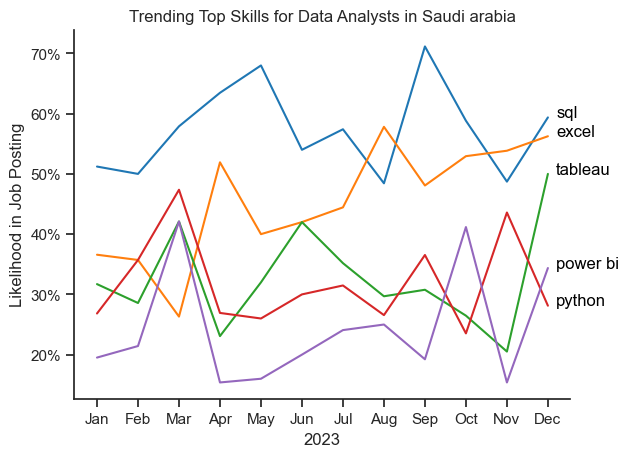

In [98]:
from matplotlib.ticker import PercentFormatter

df_plot = df_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in Saudi arabia')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()